In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, binom
from scipy.stats import poisson
import seaborn as sns
import env
np.random.seed(123)


In [2]:
import scipy

In [3]:
alpha = 0.05

AttributeError: 'Line2D' object has no property 'lable'

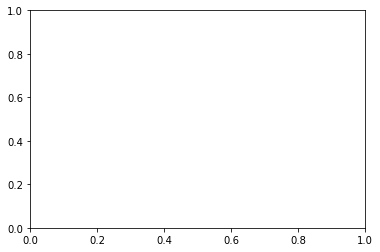

In [4]:
x = np.arange(50, 150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)


plt.plot(x, y1, lable = "office 1")
plt.plot(x, y2, lable = "office 2")

plt.legend()

In [ ]:
# sample 1
mean1 = 45
sdev1 = 1.9
ssize1 = 1115

#sample 2
mean2 = 49
sdev2 = 1.9
ssize2 = 1005

In [ ]:
t, p = scipy.stats.ttest_ind_from_stats(mean1, sdev1, ssize1, mean2, sdev2, ssize2, equal_var=True )

In [ ]:
t, p 

In [ ]:
# sample 1
mean1n = 90
sdev1n = 15
ssize1n = 40

#sample 2
mean2n = 100
sdev2n = 20
ssize2n = 50

In [ ]:
t, p = scipy.stats.ttest_ind_from_stats(mean1n, sdev1n, ssize1n, mean2n, sdev2n, ssize2n, equal_var=False )



In [ ]:
t

In [ ]:
p

In [ ]:
from pydataset import data
mpg = data('mpg')

In [ ]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

mpg.year.unique()


In [ ]:
mpg.year.hist()


In [ ]:
mpg

In [ ]:
mpg = mpg.rename(columns={'cty': 'city'})

mpg = mpg.rename(columns={'hwy': 'highway'})

mpg = mpg.rename(columns={'cyl': 'cylinder'})

In [ ]:
mpg

In [ ]:
mpg['mileage_difference'] = mpg.city - mpg.highway

mpg

In [ ]:
mpg.sort_values('mileage_difference')

In [ ]:
mpg['average_mileage'] = (mpg['highway'] + mpg['city'])/2

In [ ]:
mpg = mpg[~mpg['mileage_difference'].isna()]


In [ ]:
mpg

In [ ]:
mpg.average_mileage.mean()

In [ ]:
mpg.info()

In [ ]:
mpg.value_counts('year')

In [ ]:
fuel_2008 = mpg[mpg.year == 2008].average_mileage

In [ ]:
fuel_1999 = mpg[mpg.year == 1999].average_mileage

In [ ]:
fuel_2008.var()

In [ ]:
fuel_2008.hist()

In [ ]:
fuel_1999.var(), fuel_2008.var()

In [ ]:
fuel_1999.hist()

In [ ]:
stat, pval = stats.levene(fuel_2008, fuel_1999)

In [ ]:
if pval < 0.05:
    print('we can reject the H0 that the two samples have equal variance')
else:
    print('failed to reject null')

In [ ]:
pval

In [ ]:
alpha = 0.05

In [ ]:
t, p = stats.ttest_ind(fuel_2008, fuel_1999, equal_var=True)

t, p, alpha



In [ ]:
fuel_2008.mean(), fuel_1999.mean()

In [ ]:
plt.hist[fuel_2008, fuel_1999], lable[]

In [ ]:
# Are compact cars more fuel-efficient than the average car?

mpg.value_counts('class')

In [ ]:
# Are compact cars more fuel-efficient than the average car?

mpg.groupby('class').average_mileage.mean().sort_values(ascending = False)




In [ ]:

mpg.groupby('class').average_mileage.mean().sort_values(ascending = False).hist()

In [ ]:
fe_compact = mpg[mpg['class'] == 'compact'].average_mileage

pop_mean = mpg.average_mileage.mean()

In [ ]:
fe_compact.hist()

In [ ]:
t, p = stats.ttest_1samp(fe_compact, pop_mean)

t, p, alpha

In [ ]:
if (p/2 < alpha) and t > 0:
   print('reject')

In [ ]:
# Do manual cars get better gas mileage than automatic cars?

mpg.trans.value_counts()

In [ ]:
fe_auto = mpg[mpg.trans.str.contains('auto')].average_mileage
fe_manual = mpg[mpg.trans.str.contains('manual')].average_mileage

In [ ]:
stats.levene(fe_auto,fe_manual )

In [ ]:
fe_auto.var(), fe_manual.var()

In [ ]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var = True)

t, p/2, alpha

In [ ]:
fe_auto.mean(), fe_manual.mean()

In [5]:
#1) Use the telco_churn data. 
# -Does tenure correlate with monthly charges? 
# -Total charges? 
# -What happens if you control for phone and internet service?

In [6]:
from env import get_db_url
import pandas as pd
import numpy as np


In [7]:
url = get_db_url("telco_churn")
sql = """
SELECT * FROM customers
"""

df = pd.read_sql(sql, url)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [8]:
tenure = df.tenure
monthly_charges = df.monthly_charges

r, p = stats.pearsonr(tenure, monthly_charges)

r, p 

(0.24789985628615263, 4.0940449914811555e-99)

In [9]:
α = .05

In [10]:
# Does tenure correlate with monthly charges?
p < α

True

In [12]:
# -Total charges? 

total_charges = df.total_charges.astype(float)

In [13]:
tenure = df.tenure

p = stats.pearsonr(total_charges, tenure)

p

(0.8258804609332075, 0.0)

In [ ]:
# -What happens if you control for phone and internet service?



In [16]:
from env import host, user, password
database = "telco_churn"

def get_db_url(user,host,password,database):

    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
    return url

url = get_db_url(user,host,password,database)

database_name = "telco_churn"
query = """ 
            SELECT total_charges, tenure 
            FROM customers as c
            WHERE c.phone_service = 'yes' and c.total_charges > 0
            
        """

dfphone = pd.read_sql(query, url)

dfphone = dfphone.astype(float)


stats.pearsonr(dfphone.total_charges, dfphone.tenure)


(0.8298393210699475, 0.0)

In [17]:
from env import host, user, password
database = "telco_churn"

def get_db_url(user,host,password,database):

    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
    return url

url = get_db_url(user,host,password,database)

database_name = "telco_churn"
query = """ 
            SELECT total_charges, tenure 
            FROM customers as c
            WHERE c.internet_service_type_id < 3 and c.total_charges > 0
            
        """

dfinternet = pd.read_sql(query, url)

dfinternet = dfinternet.astype(float)


stats.pearsonr(dfinternet.total_charges, dfinternet.tenure)


(0.9319346187418136, 0.0)

In [18]:
# 2) Use the employees database.


In [38]:

from env import host, user, password
database = "employees"

def get_db_url(user,host,password,database):

    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
    return url

url = get_db_url(user,host,password,database)

database_name = "employees"
query = """ 
            SELECT
    e.*,
    datediff('2002-09-30', e.hire_date) tenure,
    t.title,
    t.from_date title_from,
    datediff('2002-09-30', t.from_date) t_tenure,
    et.titles,
    s.salary,
    s.from_date salary_from,
    datediff('2002-09-30', s.from_date) s_tenure,
    es.salaries
FROM
    employees e
JOIN 
    titles t 
    USING(emp_no)
JOIN 
    salaries s 
    USING(emp_no)
JOIN
    (SELECT 
        emp_no,
        count(*) titles
    FROM
        titles
    GROUP BY
        emp_no) et
    USING(emp_no)
JOIN
    (SELECT 
        emp_no,
        count(*) salaries
    FROM
        salaries
    GROUP BY
        emp_no) es
    USING(emp_no)
WHERE
    s.to_date > '2002-09-30'
    AND t.to_date > '2002-09-30';   
    """
            
df = pd.read_sql(query, url)

df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,tenure,title,title_from,t_tenure,titles,salary,salary_from,s_tenure,salaries
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,5940,Senior Engineer,1986-06-26,5940,1,88958,2002-06-22,100,17
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,6157,Staff,1996-08-03,2249,1,72527,2001-08-02,424,6
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,5877,Senior Engineer,1995-12-03,2493,1,43311,2001-12-01,303,7
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,5782,Senior Engineer,1995-12-01,2495,2,74057,2001-11-27,307,16
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,4766,Senior Staff,1996-09-12,2209,2,94692,2001-09-09,386,13


In [25]:
# - Is there a relationship between how long an employee has been 
# with the company and their salary?


In [40]:
df.salary

0         88958
1         72527
2         43311
3         74057
4         94692
          ...  
240119    52868
240120    69501
240121    83441
240122    55003
240123    77303
Name: salary, Length: 240124, dtype: int64

In [47]:
salary = df.tenure
tenure = df.tenure

stats.pearsonr(df.tenure, df.salary)


(0.30646256131860894, 0.0)

In [27]:

# - Is there a relationship between how long an employee has been 
# with the company and the number of titles they have had?

In [48]:
stats.pearsonr(df.tenure, df.titles)


(0.2871267889699541, 0.0)

In [29]:
# 3) Use the sleepstudy data. Is there a relationship between days and reaction time?



In [51]:
import pydataset
sleep = pydataset.data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [52]:
df = data('sleepstudy')

stats.pearsonr(df.Days, df.Reaction)


(0.5352302262650253, 9.894096322214812e-15)